# CNN Model with GUI for Hand Written Digit Recognition
### Using Tensorflow, Keras, Gradio and MNIST Dataset for training

## Section 1: Building our Model

### Part 1: Importing required libraries


In [1]:
import tensorflow as tf
from tensorflow import keras

### Part 2: Importing the Data and understanding the data

In [2]:
from matplotlib import pyplot

(trainX, trainy) , (testX, testy) = keras.datasets.mnist.load_data()
print('Train: X=%s, y=%s' %(trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' %(testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


### Part 3: Visualising the data

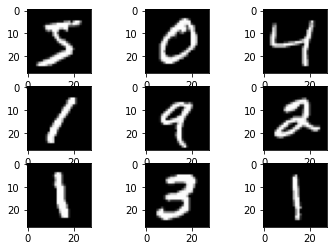

In [3]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

### Part 4: Preprocessing the data

In [4]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

#### Applying One-Hot-Encoding to image labels

In [5]:
trainy = keras.utils.to_categorical(trainy)
testy = keras.utils.to_categorical(testy)

#### Normalising image data

In [6]:
trainX = trainX.astype('float32')/255.0
testX = testX.astype('float32')/255.0

### Part 5: Defining the CNN Model

In [7]:
#Defining model
def define_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters = 32, kernel_size=3, activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
    model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=64,activation='relu',kernel_initializer='he_uniform'))
    model.add(keras.layers.Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
    model.add(keras.layers.Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Part 6: Training and validating the model

In [8]:
model = define_model()
model.fit(trainX, trainy, epochs=10, batch_size=32, validation_data=(testX, testy))

Epoch 1/10
1875/1875 [==============================] - 89s 47ms/step - loss: 0.1208 - accuracy: 0.9630 - val_loss: 0.0563 - val_accuracy: 0.9826
Epoch 2/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0470 - accuracy: 0.9857 - val_loss: 0.0334 - val_accuracy: 0.9895
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0308 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0341 - val_accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.0389 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0501 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0267 -

### Part 7: Testing our model with some test images

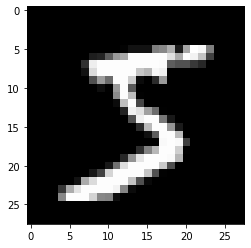

Predicted Value:  5
Probability {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.99, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0}


In [9]:
import numpy as np
from keras.preprocessing import image

#Loading a sample test image from MNIST dataset
test_image = trainX[0]

#Displaying the input image
pyplot.imshow(np.squeeze(test_image), cmap=pyplot.get_cmap('gray'))
pyplot.show()

#As the image is already processed, we skip the preprocessing steps

test_image = np.expand_dims(test_image, axis=0) #Adding an extra-dimension to image to correspond it to a batch

result = model.predict(test_image)[0] #Predicting the value using CNN model and input image

#Displaying the result
print("Predicted Value: ", np.argmax(result))
print("Probability: ", {int(i): int((result[i])*100)/100 for i in range(10)}) #Returing the result as a dictionary

### Part 8: Saving the CNN Model

In [10]:
model.save('MNIST_MODEL.h5')

## Section 2: Building GUI

### Part 1: Importing the CNN Model

In [11]:
from tensorflow.keras.models import load_model
try:
  model = load_model('MNIST_MODEL.h5')
  print("Successfully Imported Model")
except:
  print("Error occured while importing model")

Successfully Imported Model


### Part 2: Installing required libraries

In [12]:
!pip install gradio

### Part 3: Importing required libraries


In [13]:
from tensorflow.keras.preprocessing import image
import gradio as gr
import numpy as np

### Part 4: Defining function to recoginise the digit from input image

In [14]:
def recognize_digit(img):
  img = image.img_to_array(img) #Converting PIL instance of image to numpy array
  img = img/255.0 #To normalise the image
  img = np.expand_dims(img, axis=0) #Adding another dimension for model predict
  result = model.predict(img)[0] #Predicting the value using CNN model and input image
  
  return {int(i): int((result[i])*100)/100 for i in range(10)} #Returing the result as a dictionary

In [15]:
gr.Interface(fn=recognize_digit, inputs="sketchpad",live=True,outputs="label").launch(debug='False')

#Launching the interface